# ***EE chula model2***

# Implementation
- number of layer = 3
- number of hidden layer = 2
- layer 1 = 64 units, activation function is relu
- layer 2 = 64 units, activation function is relu
- loss = Mean Squared Error (MSE) = 0.03
- metrics = Mean Absolute Error (MAE) 
- optimizer = RMSPropOptimizer
- kernel_initializer = uniform
- stop training when the validation score doesn't improve. = about 500 epochs

# Feature
measurement data of solar cell on the rooftop of EE building (capacity of 8kW) collected during Jan 2017-Jun 2018 through CUBEMS portal. 

- datetime
- date
- time
- I is Solar irradiance (W/m2)
- T is Temperature (oC*10)
- UV is UV index (UV index*10)
- WS is Wind speed (m/s*10)
- RH is Relative humidity (%)
- P is Solar power (W*min)

# Result
- MSE = 0.03 on the test set


# Note
- loss=mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_logarithmic_error,
     squared_hinge,hinge,logcosh<br>
- optimizer = sgd(Stochastic gradient descent optimizer),RMSProp optimizer,Adagrad optimizer,Adadelta  <br>                     optimizer,Adam,Adamax,Nadam,TFOptimizer
- metrics = mae,acc<br>

In [7]:
!ln -s ../data/ ./
!ln -s ../out/ ./

In [26]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.__version__

'1.9.0'

# load data for train

In [27]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')
#buffer datetime
buffer_datetime_train = train.datetime
#remove object
train = train.select_dtypes(exclude=['object'])
#replace misssing value
train.fillna(0,inplace=True)

# load data for test

In [28]:
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')
#buffer datetime
buffer_datetime_test = test.datetime
#remove object
test = test.select_dtypes(exclude=['object'])
#replace misssing value
test.fillna(0,inplace=True)

In [29]:
print('dimension of train:', train.shape)
print('dimension of test:', test.shape)

dimension of train: (131586, 6)
dimension of test: (16147, 5)


In [30]:
print("features:",list(train.columns))

features: ['I', 'T', 'UV', 'WS', 'RH', 'P']


# remove outlier

In [31]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


# Normalize
When input data features have values with different ranges, each feature should be scaled independently.

In [32]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('P')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)

mat_new = np.matrix(train.drop('P',axis = 1))
mat_y = np.array(train.P).reshape((118427,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

# create training_set and prediction_set

In [33]:
# List of features
COLUMNS = col_train #column train (x train)
FEATURES = col_train_bis  #column train-label (x test)
LABEL = "P"

# Columns
feature_cols = FEATURES #(x test)

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS] #column train (x train)
prediction_set = train.P # column P

In [34]:
print(type(training_set))
print(type(prediction_set))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# create x_train and Test 

In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

In [36]:
print(type(train_data))
print(type(test_data))
print(type(train_labels))
print(type(test_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [37]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(79346, 5)
(39081, 5)
(79346,)
(39081,)


In [38]:
train_data = train_data.values
test_data = test_data.values
train_labels = train_labels.values
test_labels = test_labels.values

# Shuffle the training set

In [39]:
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [40]:
print("Training set: {}".format(train_data.shape))  
print("Testing set:  {}".format(test_data.shape))   

Training set: (79346, 5)
Testing set:  (39081, 5)


# Create training_set

In [43]:
#train_labels = pd.DataFrame(train_labels, columns = [LABEL])
#training_set = pd.DataFrame(train_data, columns = FEATURES).merge(train_labels, left_index = True, right_index = True)
#training_sub = training_set[col_train]

# Create testing_set

In [44]:
#test_labels = pd.DataFrame(test_labels, columns = [LABEL])
#testing_set = pd.DataFrame(test_data, columns = FEATURES).merge(test_labels, left_index = True, right_index = True)

In [45]:
column_names = ['I', 'T', 'UV', 'WS', 'RH']
df = pd.DataFrame(train_data, columns=column_names)
df.head()

,I,T,UV,WS,RH
0,0.247706,0.333333,0.058824,0.024862,0.656022
1,0.013761,0.452675,0.000000,0.000000,0.975225
2,0.206422,0.366255,0.019608,0.000000,0.948037
3,0.472477,0.559671,0.245098,0.055249,0.235360
4,0.296330,0.403292,0.088235,0.267956,0.853604


In [46]:
print(train_labels[0:10])  # Display first 10 entries

[0.21570319 0.         0.19672131 0.47540984 0.29098361 0.18442623
 0.55327869 0.24590164 0.01639344 0.        ]


# Create model

In [47]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


# Training progress by printing a single dot for each completed epoch.

In [48]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

# Plot Mean Abs Error vs epoch

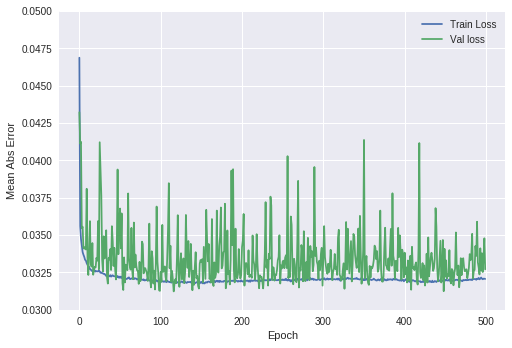

In [54]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0.03,0.05])

plot_history(history)

# The patience parameter is the amount of epochs to check for improvement.
- This graph shows little improvement in the model after about 90 epochs
- We'll use a callback that tests a training condition for every epoch
- If a set amount of epochs elapses without showing improvement, then automatically stop the training.
- Early stopping is a useful technique to prevent overfitting.


.........................................................................................

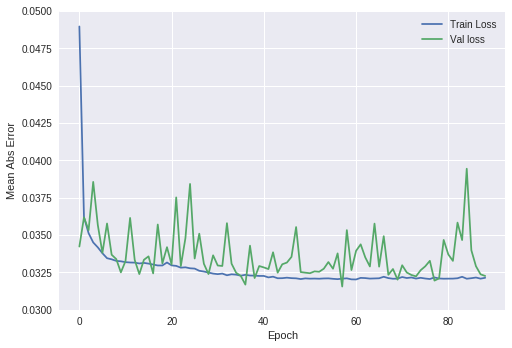

In [55]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

# Let's see how did the model performs on the test set:

In [73]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae))
print("Testing set Mean Abs loss: ${:7.2f}".format(loss))

Testing set Mean Abs Error: $   0.03
Testing set Mean Abs loss: $   0.00


# Finally, predict some Solar Power using data in the testing set:

In [57]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[0.35302833 0.6694135  0.5929787  ... 0.3501575  0.59418523 0.6245334 ]


# Sections 2 Predictions

# Create training_set

In [62]:
train_labels = pd.DataFrame(train_labels, columns = [LABEL])
training_set = pd.DataFrame(train_data, columns = FEATURES).merge(train_labels, left_index = True, right_index = True)
training_sub = training_set[col_train]

# Create testing_set

In [64]:
test_labels = pd.DataFrame(test_labels, columns = [LABEL])
testing_set = pd.DataFrame(test_data, columns = FEATURES).merge(test_labels, left_index = True, right_index = True)

# Predict

In [66]:
import itertools
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

# Inverse_transform

In [67]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(39081,1))

In [68]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = [COLUMNS]).P

# Plot

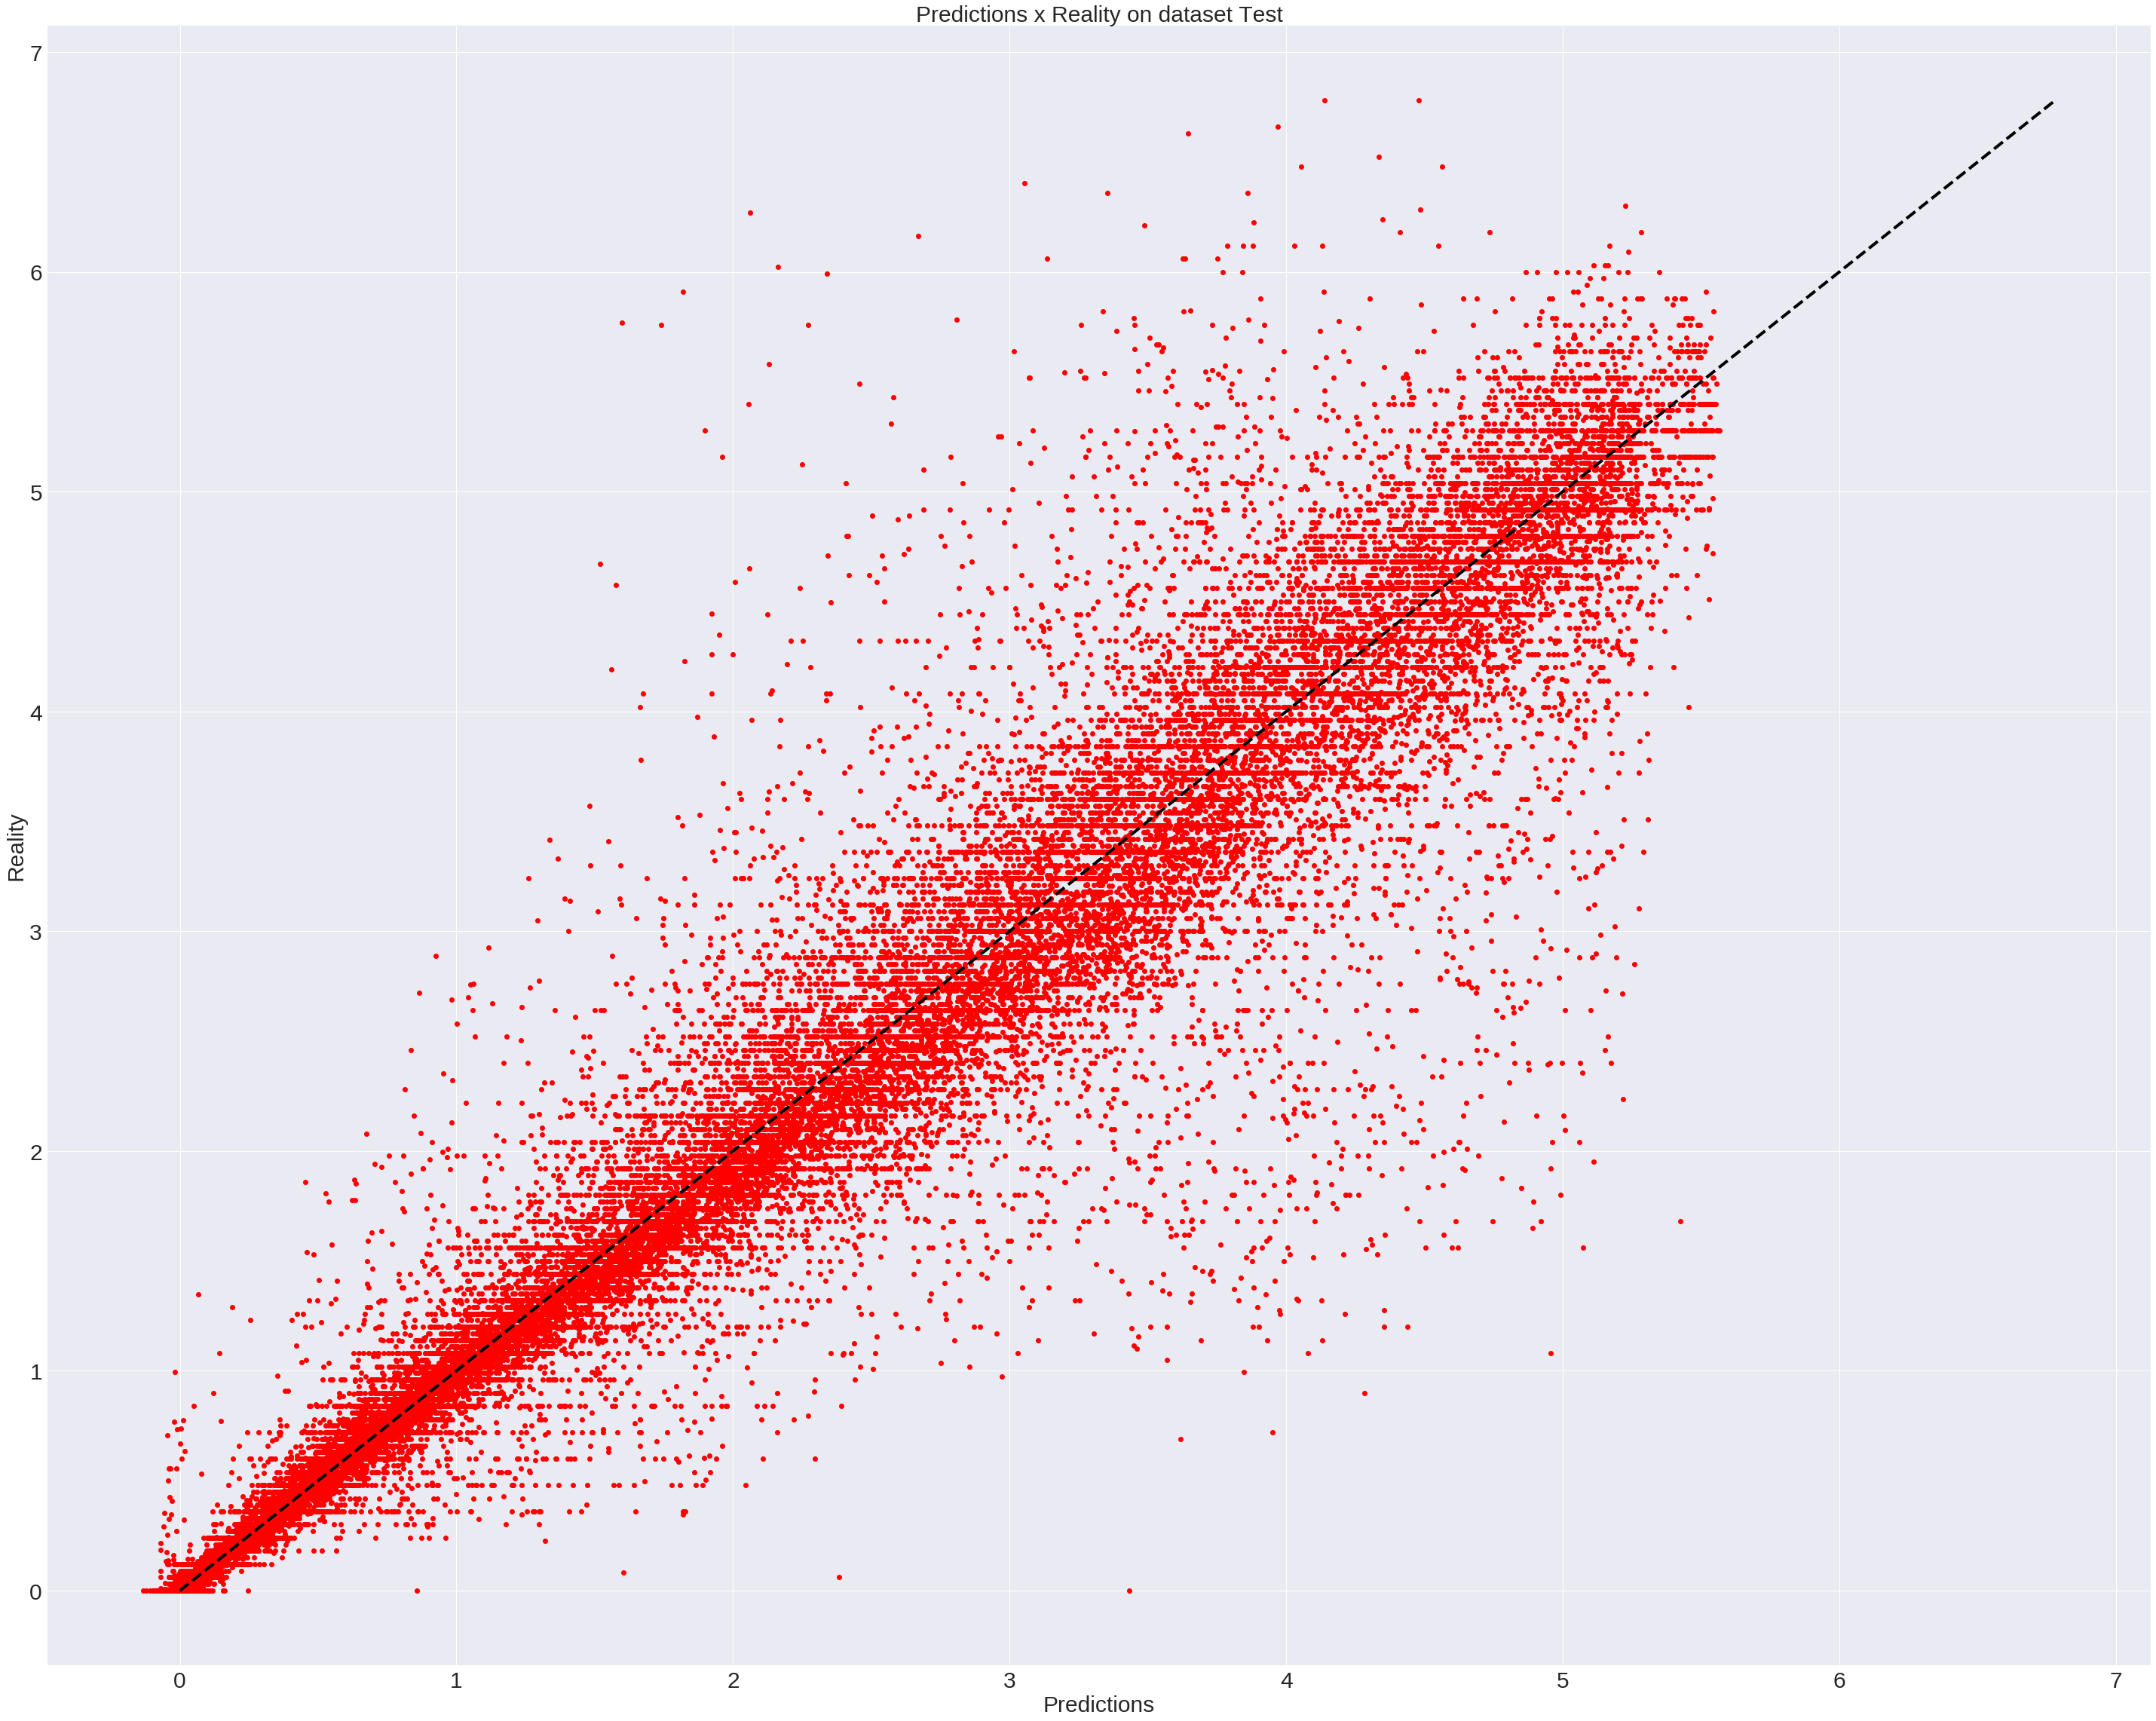

In [70]:
import matplotlib
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

# Predict on unseen data

In [71]:
y_predict = model.predict(np.array(test))

def to_submit(pred_y,name_out):
    y_predict = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(prepro_y.inverse_transform(np.array(y_predict).reshape(len(y_predict),1)), columns = ['P'])
    y_predict = y_predict.join(buffer_datetime_test)
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "Predict_model2_unseen_data")